## Sales_Forecasting_m5 - trend and seasonality analysis

In [1]:
# Import Libraries and load processed data
import pandas as pd
import matplotlib.pyplot as plt

# Load processed data
store_daily_sales = pd.read_csv(
    "../data/processed/store_daily_sales.csv",
    parse_dates=["date"]
)

In [2]:
# Filter one store
store_id = "CA_1"

store_ts = (
    store_daily_sales
    [store_daily_sales["store_id"] == store_id]
    .set_index("date")
)

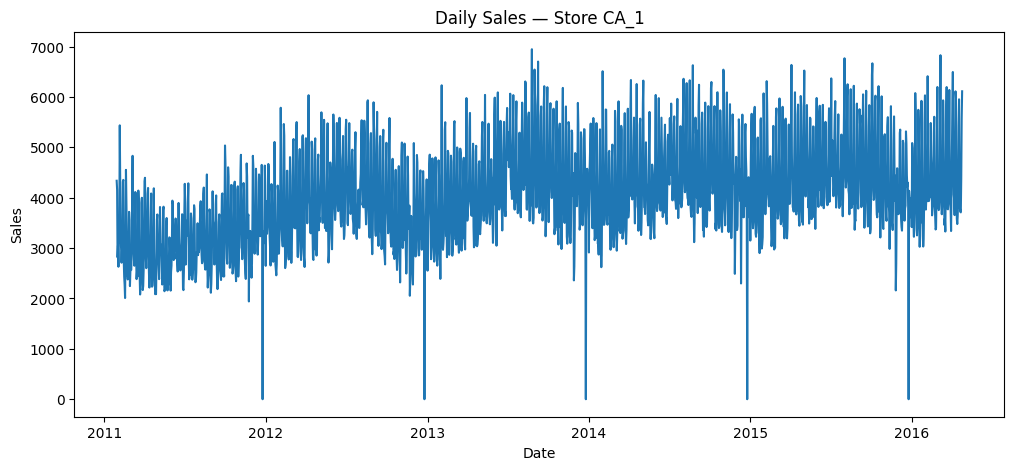

In [3]:
# Plot daily sales for Store 1
plt.figure(figsize=(12, 5))
plt.plot(store_ts.index, store_ts["sales"])
plt.title(f"Daily Sales — Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [4]:
# Weekly aggregation
weekly_sales = store_ts["sales"].resample("W").sum()

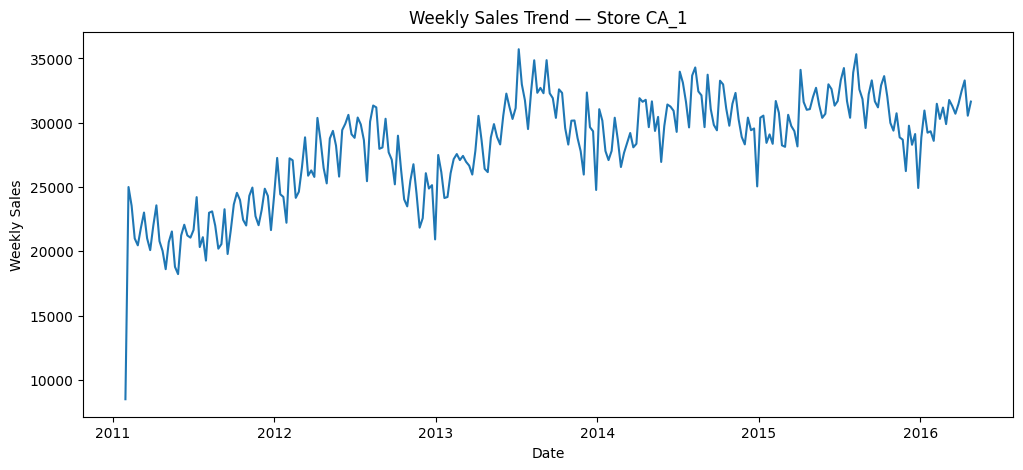

In [5]:
# Save weekly trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_sales)
plt.title(f"Weekly Sales Trend — Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")

plt.savefig(
    "../visuals/weekly_sales_trend.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

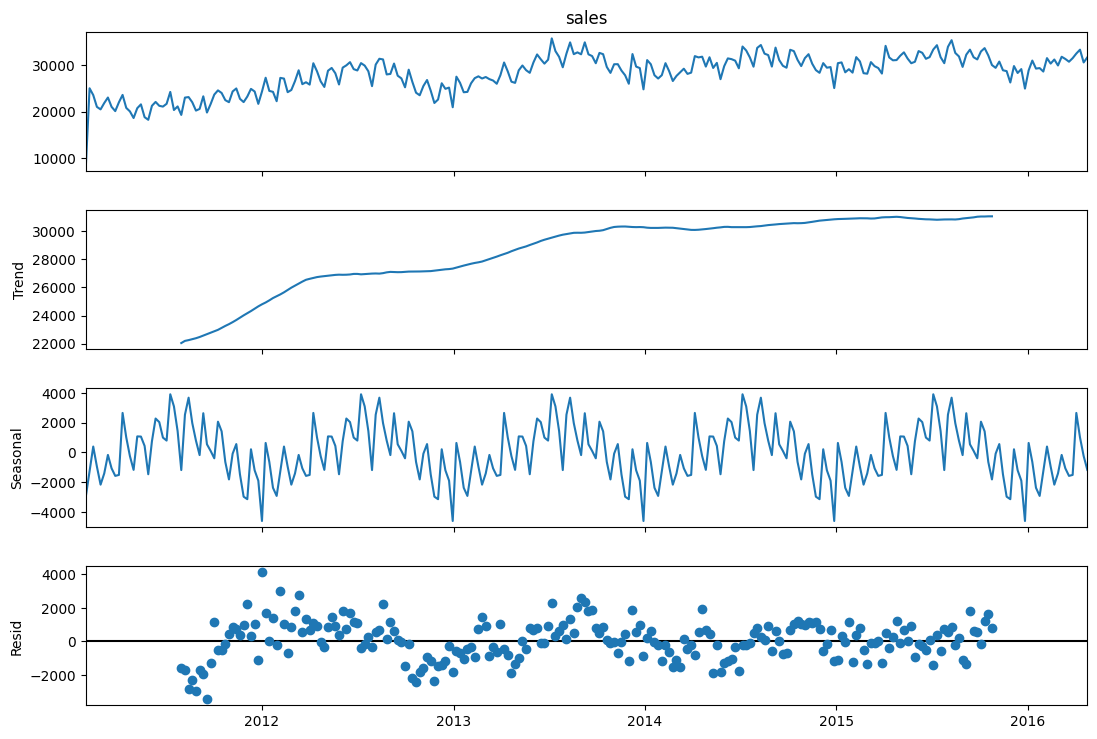

In [6]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
    weekly_sales,
    model="additive",
    period=52
)

fig = decomposition.plot()
fig.set_size_inches(12, 8)

fig.savefig(
    "../visuals/seasonal_decomposition.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()